# Úkoly

## SciPy Special

In [2]:
import scipy.special as special
import numpy as np
import matplotlib.pyplot as plt

1. Výpočet Eulerovy konstanty:

- spočtěte Eulerovu konstantu $\gamma$ pomocí funkce `digamma` z modulu `scipy.special`
    - Eulerova konstanta se dá spočítat jako $\gamma = -\psi(1)$, kde $\psi$ je digamma funkce
- porovnejte výsledek s definicí Eulerovy konstanty (pro $n = 100, 1000, ...$) $$\gamma = \lim_{n \to \infty} \left(- \ln(n) + \sum_{k=1}^n \frac{1}{k} \right)$$

In [8]:
def eulerova_konstanta_def(n):
    return -np.log(n) + sum([1.0/k for k in range(1, n+1)])

print(eulerova_konstanta_def(100))
print(eulerova_konstanta_def(2000))
print(eulerova_konstanta_def(15000))
print(-special.digamma(1.0))

0.5822073316515288
0.5774656440682016
0.5772489978644781
0.5772156649015329


2. Vykreslete Beta funci na intervalu $[1, 2]\times[1, 2]$ 

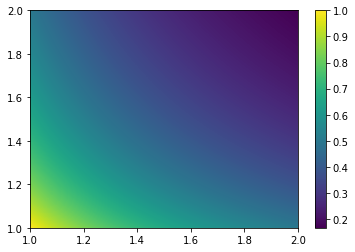

In [9]:
x = np.linspace(1, 2, 1000)
y = np.linspace(1, 2, 1000)
X, Y = np.meshgrid(x, y)
Z = special.beta(X, Y)

plt.figure()
plt.pcolormesh(X, Y, Z)
plt.colorbar()
plt.show()

## SciPy Sparse

In [15]:
import scipy.sparse as sparse
import scipy.sparse.linalg as sla
import numpy as np
import matplotlib.pyplot as plt

1. Sestavení řídkých matic. Sestavte sparse matici `A` ve formátu CSR. Representující následující matici:
```
[[1 1 0 0]
 [1 3 1 0]
 [0 1 5 1]
 [0 0 1 7]]
 ```
- Použijte sestavení pomocí seznamu indexů a hodnot.


In [18]:
data = np.array([1, 1, 1, 3, 1, 1, 5, 1, 1, 7])
#idx = np.array([0, 1, 0, 1, 2, 1, 2, 3, 2, 3])
#ptr = np.array([0, 2, 5, 8, 10])
radky = np.array([0, 0, 1, 1, 1, 2, 2, 2, 3, 3])
sloupce = np.array([0, 1, 0, 1, 2, 1, 2, 3, 2, 3])

A = sparse.csr_matrix((data, (radky, sloupce)))
print(A.todense())

[[1 1 0 0]
 [1 3 1 0]
 [0 1 5 1]
 [0 0 1 7]]


2. Řešení série soustav lineárních rovnic se stejnou maticí `A` a různými pravými stranami `b`:
- sestavte LU faktorizaci matice `A`
- řešte soustavu rovnic pro pravé strany `b1 = [1, 2, 3, 4]` a `b2 = [4, 3, 2, 1]` pomocí spočtené LU faktorizace


In [38]:
lu_decomposition = sparse.linalg.splu(A)

L = lu_decomposition.L
U = lu_decomposition.U
P_permutace = lu_decomposition.perm_c
P = sparse.csc_matrix((np.ones_like(P_permutace), (P_permutace, np.arange(4)))).todense()

b = np.array([[1, 2, 3, 4], [4, 3, 2, 1]]).T

y = sparse.linalg.spsolve_triangular(L, P @ b, True)
x = sparse.linalg.spsolve_triangular(U, y, False)

print(x)

[[ 0.72131148  4.7704918 ]
 [ 0.50819672  0.06557377]
 [ 0.27868852 -0.7704918 ]
 [ 0.44262295  0.54098361]]


/usr/lib/python3/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:322: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/usr/lib/python3/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:557: SparseEfficiencyWarning: CSR matrix format is required. Converting to CSR matrix.
  warn('CSR matrix format is required. Converting to CSR matrix.',


3. Spektrální rozklad:
- Spočítejte největší vlastní číslo a příslušný vlastní vektor matice A z úlohy 1.

In [47]:
A = sparse.csr_matrix((data, (radky, sloupce)), dtype=float)
sparse.linalg.eigsh(A, k=1)

(array([7.45084438]),
 array([[0.01476242],
        [0.09523007],
        [0.40909182],
        [0.90739032]]))

## SciPy FFTpack

In [48]:
from IPython.display import Audio
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

fs, signal = sp.io.wavfile.read('butterfly_noise.wav')
signal = signal / np.max(np.abs(signal))
Audio(data=signal, rate=fs)

AttributeError: module 'scipy' has no attribute 'io'

1. Pokuste se odstranit šum z nahrávky pomocí Fourierovy transformace:
- spočtěte Fourierovu transformaci nahrávky (`fft`)
- vykreslete si amplitudové spektrum (`abs` výsledku předchozího bodu) a zhodnoťte hranici mezi šumem a signálem
- odstraňte šum z amplitudového spektra a spočtěte inverzní Fourierovu transformaci (`ifft`)
- přehrajte si reálnou složku výsledku `Audio(data=np.real(filtered_signal), rate=fs)`

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


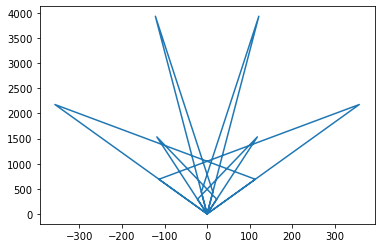

In [ ]:
vzorkovaci_frekvence = 8000; doba_trvani = 1
t = np.linspace(0, doba_trvani, int(doba_trvani * vzorkovaci_frekvence))
frekvence = 800; harmonicka2 = 2.4 * frekvence; harmonicka3 = 1.6 * frekvence
signal = (np.sin(2 * np.pi * frekvence * t) + 0.6 * np.sin(2 * np.pi * harmonicka2 * t) + 0.4 * np.sin(2 * np.pi * harmonicka3 * t))

freq_spectrum = fftpack.fft(signal)
freq = fftpack.fftfreq(len(t), 1/freq_spectrum)
plt.figure()
plt.plot(freq, np.abs(freq_spectrum))
plt.show()

mask = np.abs(freq_spectrum) < 240
freq_spectrum[mask] = 0
signal_filtered = np.real(fftpack.ifft(freq_spectrum))
Audio(data=signal_filtered, rate=frekvence)

# ???

## SciPy Optimize

In [62]:
import scipy.optimize as opt

1. Nalezněte globální maximum funkce $$f(x) = \exp(-x^2) - 1.1 \cdot \exp(-(x-2)^2)$$

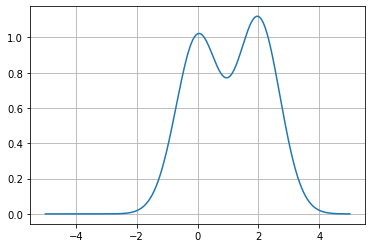

In [63]:
x = np.linspace(-5, 5, 1000)
y = np.exp(-x**2) + 1.1*np.exp(-(x-2)**2)
plt.plot(x, y)
plt.grid()

In [74]:
f = lambda x: -(np.exp(-x**2) + 1.1*np.exp(-(x-2)**2))
x_min = opt.fmin(func=f, x0=1)
print(x_min, f(x_min))

Optimization terminated successfully.
         Current function value: -1.119704
         Iterations: 17
         Function evaluations: 34
[1.96201172] [-1.11970432]


2. Nalezněte všechny kořeny funkce $f(x) = 7.875 \cdot x^5 - 8.75 \cdot x^3 + 1.875 \cdot x$ na intervalu $[-1, 1]$.

0.0


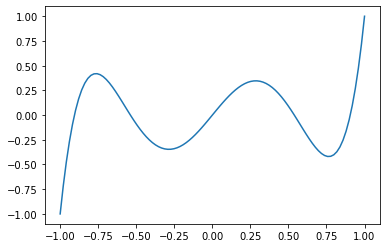

In [83]:
def f(x): return 7.875 * x**5 - 8.75 * x**3 + 1.875 * x

vysledek = opt.root_scalar(f, bracket=(-1, 1))
print(vysledek.root)

t = np.linspace(-1, 1, 100)
plt.plot(t, f(t))

## SciPy Interpolate

1. Spočtěte lineární a kubickou interpolaci bodů $(0, 0), (1, 1), (2, 0), (3, 1)$ na intervalu $[0, 3]$ a vše vykreslete.

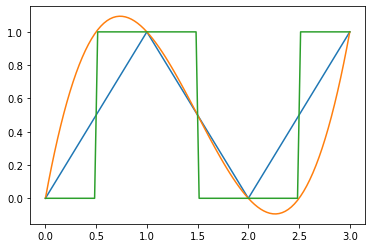

In [90]:
import scipy.interpolate as interpol

x_data = np.array([0, 1, 2, 3])
y_data = np.array([0, 1, 0, 1])
x = np.linspace(0, 3, 100)

linear = interpol.interp1d(x_data, y_data, kind="linear")
cubic = interpol.interp1d(x_data, y_data, kind="cubic")
nearest = interpol.interp1d(x_data, y_data, kind="nearest")

plt.figure()
plt.plot(x, linear(x))
plt.plot(x, cubic(x))
plt.plot(x, nearest(x))
plt.show()

2. Pro stejné body spočtěte aproximaci polynomem stupně 2 a vykreslete.

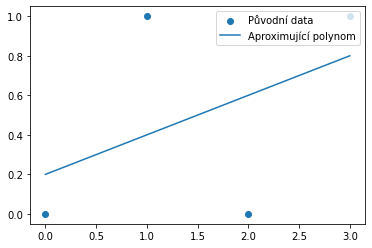

In [95]:
koeficienty = np.polyfit(x_data, y_data, 2)
p = np.poly1d(koeficienty)
plt.scatter(x_data, y_data, label='Původní data')
plt.plot(x, p(x), label='Aproximující polynom')
plt.legend(loc="best")

## SciPy Integrate

In [96]:
import scipy.integrate as spi

1. Spočtěte integrál funkce $f(x) = x^2$ na intervalu $[1, 2]$ pomocí funkce `quad`.

In [97]:
val, err = spi.quad(lambda x: x*x, 1, 2)
print(val, err)

2.3333333333333335 2.590520390792032e-14


2. Spočtěte integrál funkce $f(x) = \exp(-x)$ na intervalu $[0, \infty]$ pomocí funkce `quad`.

In [98]:
val, err = spi.quad(lambda x: np.exp(-x), 0, np.inf)
print(val, err)

1.0000000000000002 5.842606742906004e-11


3. Spočtěte průběh radioaktivního rozpadu:
- rychlost úbytku radioaktivní látky (její hmotnosti) je úměrná aktuální hmotnosti látky $$m'(t) = -\lambda m(t)$$
    - kde $\lambda$ je konstanta pocházející z poločasu rozpadu
- spočtěte hmotnost látky v čase $t \in [0, 100]$ pro $m(0) = 1$ a $\lambda = 0.1$ pomocí funkce `odeint`